In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [28]:
# load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [29]:
#get mode of the composer
#df_train['composer'] = df_train['composer'].fillna(df_train['composer'].mode()[0])
print(df_train['Composer'].mode()[0])

Finneas O'Connell


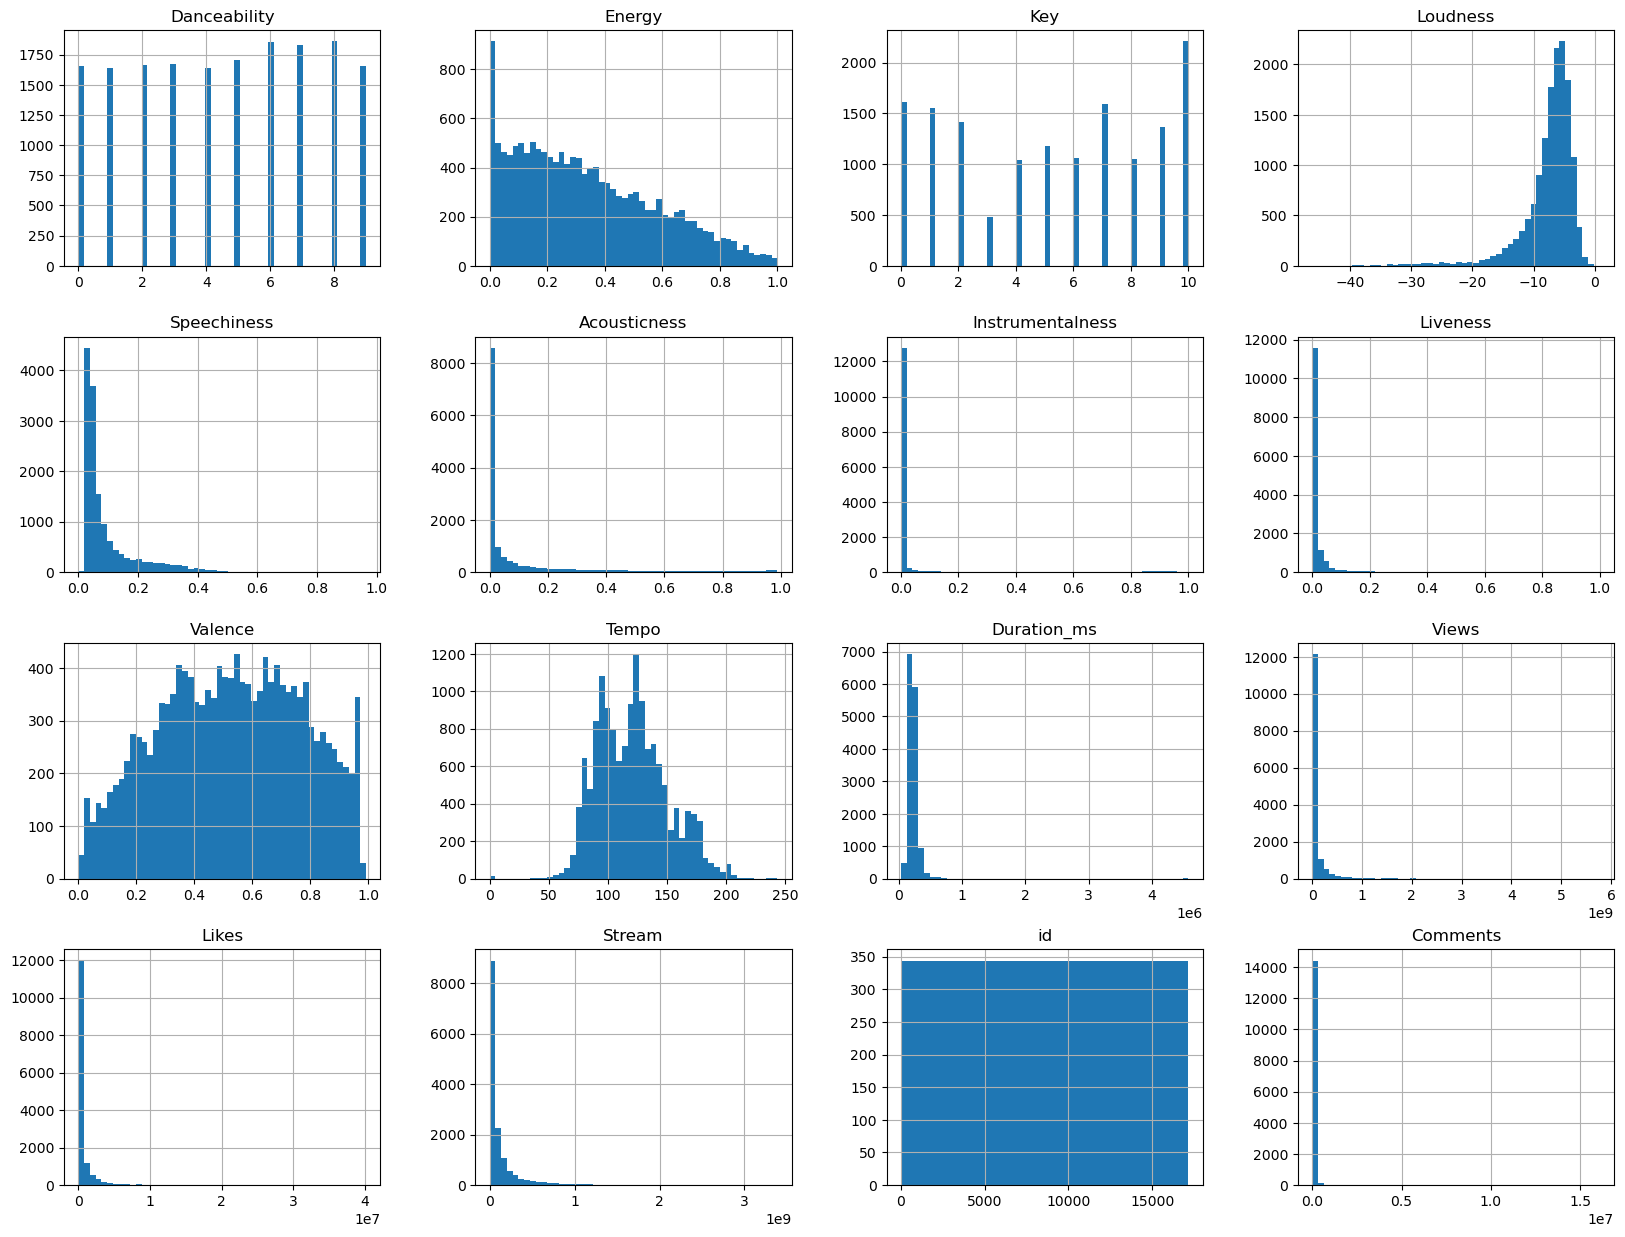

In [30]:
# check all features distribution
df_train.hist(bins=50, figsize=(20,15))
plt.show()


In [31]:
# count missing values in composer
df_train['Composer'].isnull().sum()

2558

In [32]:
df_train.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Licensed',
       'official_video', 'id', 'Track', 'Album', 'Uri', 'Url_spotify',
       'Url_youtube', 'Comments', 'Description', 'Title', 'Channel',
       'Composer', 'Artist'],
      dtype='object')

In [33]:
df_train.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
Album_type           object
Licensed             object
official_video       object
id                    int64
Track                object
Album                object
Uri                  object
Url_spotify          object
Url_youtube          object
Comments            float64
Description          object
Title                object
Channel              object
Composer             object
Artist               object
dtype: object

In [34]:
def create_dictionary(keys):
    dictionary = {}
    for key in keys:
        dictionary[key] = None  
    return dictionary


def data_process_keep_only_numerical(input_data):
    numeric_columns = input_data.select_dtypes(include=['int64', 'float64'])
    return numeric_columns

def word_dictionary(arr_columns, input_train, input_test):
    # Append the two DataFrames
    appended_df = pd.concat([input_train, input_test])
    appended_df.reset_index(drop=True, inplace=True)
    arr_word_dict = {}
    for col in arr_columns:
        uniq_tmp = appended_df[col].unique()
        arr_dict = {value: value if isinstance(value, (int, float)) and np.isnan(value) else index for index, value in enumerate(uniq_tmp)}
        arr_word_dict[col] = arr_dict
    return arr_word_dict

# word_dict = word_dictionary([
#     'Album_type', 'Licensed', 'official_video', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 
#     'Description', 'Title', 'Channel', 'Composer', 'Artist'], df_train, df_test)

word_dict = word_dictionary(['Composer'], df_train, df_test)

# Using Dictionary:
#   Album_type, Licensed, official_video, Composer, Channel, Artist
# Can be removed:
#   Uri, Url_spotify, Url_youtube
# Cannot use word_dict:
#   Track, Album, Description, Title
# ret_train.head()
# ret_test.head()

In [35]:
word_dict['Album_type']

KeyError: 'Album_type'

In [ ]:
df_train.head(4)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.340,83.398,...,Sinkovsky Plays and Sings Vivaldi,spotify:track:7njAZhca4o80qQdCgyEWya,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=NzCL9uLkQSI,3070.0,Antonio Vivaldi's 4th Concerto - From his Most...,"Antonio Vivaldi - Concerto No.4 in F minor, Op...",Mozafunkula,NaN,Marshmello
1,0.0,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746,148.692,...,NaN,spotify:track:2nnXe7n3Vivs7OfQKRsfWD,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...","A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",Anton Paisov,Finneas O'Connell,Bon Iver
2,0.0,NaN,6.0,-15.596,NaN,0.667628,0.867000,0.001772,0.380,84.899,...,Vivaldi: The Four Seasons,spotify:track:0VQMAup2VdeQWLCvM14Uz2,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=jAnzlpPuIDU,122.0,"A. Vivaldi Concerto No. 2 in G minor, RV 315, ...",NaN,Anton Paisov,Finneas O'Connell,Kamasi Washington
3,1.0,0.209585,NaN,-6.251,0.0277,0.003796,NaN,0.001000,NaN,150.220,...,Life Thru A Lens,spotify:track:1M2nd8jNUkkwrc1dgBPTJz,https://open.spotify.com/artist/2HcwFjNelS49kF...,https://www.youtube.com/watch?v=luwAMFcc2f8,24350.0,25 years of Life Thru A Lens. Pre-order the br...,Robbie Williams - Angels,robbiewilliamsvevo,Louis Bell,Drake


In [ ]:
def data_convert(df, word_dict):
    df_ret = df.copy()
    for dic in word_dict:
        print(dic)
        for key_dic in word_dict[dic]:
            df_ret.loc[df_ret[dic] == key_dic, dic] = word_dict[dic][key_dic]
    return df_ret     

In [ ]:
# #obj_columns = df_train_embedding.select_dtypes(include=['object']).columns
# obj_columns = df_train.select_dtypes(include=['object']).columns
# # print(int_columns)
# # convert integer columns to float
# #df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)
# df_train_embedding[obj_columns] = df_train[obj_columns].astype(np.float)

In [ ]:
def corr_matrix_with_threshold(df, threshold, title_str = "Filtered Correlation Matrix (Half Square)"):
    # Add target column to the DataFrame
    corr_matrix = df.corr()
    # Filter the correlation matrix based on the threshold
    filtered_matrix = corr_matrix[corr_matrix.abs() > threshold]
    mask = np.triu(np.ones_like(filtered_matrix, dtype=bool))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.title(title_str)
    plt.show()


In [ ]:
#corr_matrix_with_threshold(df_train_embedding, 0.2)

In [ ]:
def remove_unimportant_column(df, arr_column):
    df_dropped = df.drop(arr_column, axis=1)
    return df_dropped

In [40]:
arr_NOT_important_column = ['Uri', 'Url_spotify', 'Url_youtube', 'Description', 'id', 'Licensed', 'official_video', 'Title', 'Album']
#df_train_embedding_important = remove_unimportant_column(df_train_embedding, arr_NOT_important_column)
#df_test_embedding_important = remove_unimportant_column(df_test_embedding, arr_NOT_important_column)

df_train_embedding_important = remove_unimportant_column(df_train, arr_NOT_important_column)
df_test_embedding_important = remove_unimportant_column(df_test, arr_NOT_important_column)

In [41]:
arr_NOT_important_column = [ 'Tempo', 'Likes', 'Stream', 'Energy', 'Views', 'Track', 'Key', 'Liveness', 'Duration_ms',  'Album_type', 'Comments','Channel','Artist' ]
df_train_embedding_important_simple = remove_unimportant_column(df_train_embedding_important, arr_NOT_important_column)
df_test_embedding_important_simple = remove_unimportant_column(df_test_embedding_important, arr_NOT_important_column)

In [36]:
df_train_embedding = data_convert(df_train, word_dict)
df_test_embedding = data_convert(df_test, word_dict)

Composer
Composer


In [38]:
df_train_embedding.Composer

0        NaN
1          1
2          1
3          2
4          3
        ... 
17165      1
17166      3
17167      4
17168      1
17169      3
Name: Composer, Length: 17170, dtype: object

In [39]:
#obj_columns = df_train_embedding.select_dtypes(include=['object']).columns
obj_columns = df_train_embedding_important_simple.select_dtypes(include=['object']).columns
print(obj_columns)
# convert integer columns to float
#df_train_embedding[obj_columns] = df_train_embedding[obj_columns].astype(np.float)
df_train_embedding[obj_columns] = df_train_embedding_important_simple[obj_columns].astype(np.float)

Index(['Composer'], dtype='object')


/tmp/ipykernel_9776/4198063971.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_train_embedding[obj_columns] = df_train_embedding_important_simple[obj_columns].astype(np.float)


ValueError: could not convert string to float: "Finneas O'Connell"

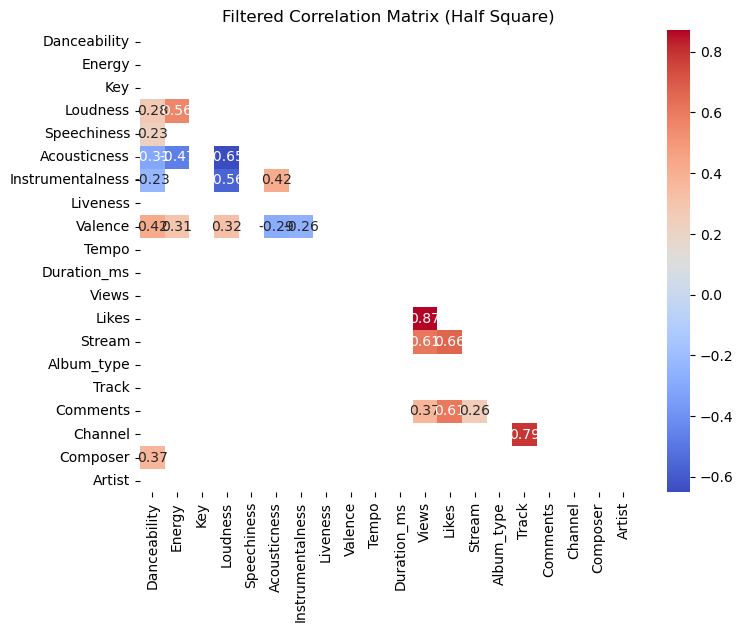

In [ ]:
#corr_matrix_with_threshold(df_train_embedding_important, 0.2)

* Danceability ==> Valence: 0.424102 | Composer: 0.295219| Loudness: 0.275222 | Speechiness:0.228473|  Acousticness:-0.309605| Instrumentalness: -0.231177 | Likes: 0.103480| 
* Valence      ==> Loudness: 0.319542  |  Energy: 0.305514  |  Acousticness: -0.288254  | Instrumentalness: -0.258984  | Composer: 0.143226
* Composer     ==> Valence: 0.143226 | 
* Loudness     ==> Energy: 0.559834 | Valence: 0.319542 |Tempo: 0.146088	| Acousticness: -0.651000 |Instrumentalness: -0.563593 |  Views: 0.110302 | Likes: 0.123328 | Stream: 0.112378
* Speechiness  ==> Acousticness: -0.141015 |Instrumentalness: -0.113436
* Acousticness ==> Energy: -0.471571 | Loudness: -0.651000 |Instrumentalness: 0.416931| Energy: -0.471571 | Tempo: -0.127284
* Instrumentalness ==> Energy: -0.135264 | Loudness: -0.563593| Acousticness: 0.416931| Valence: -0.258984
* Likes ==> Views: 0.871248 |Stream: 0.664720 |Comments: 0.609587| Loudness:0.123328

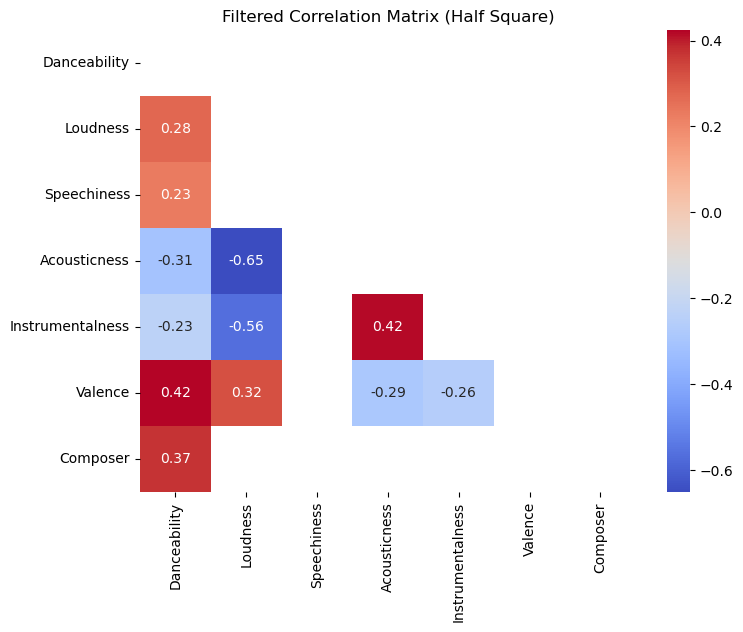

In [ ]:
corr_matrix_with_threshold(df_train_embedding_important_simple, 0.2)

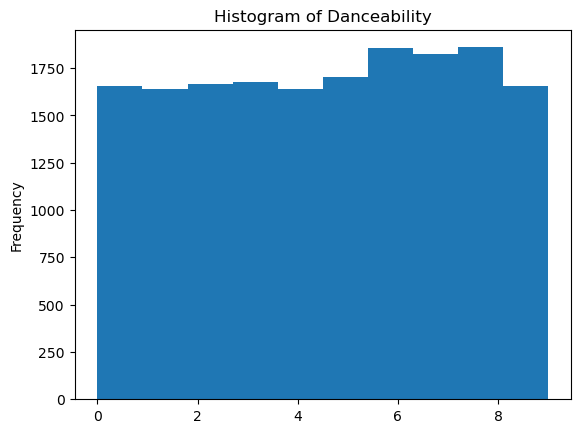

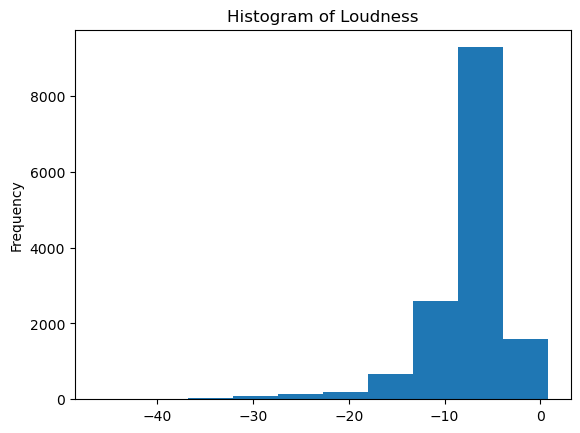

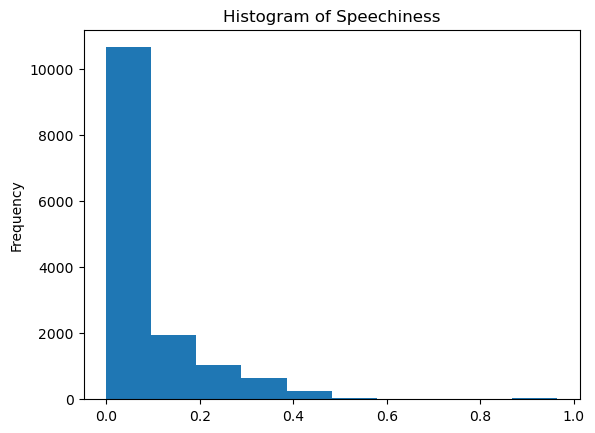

In [ ]:
import matplotlib.pyplot as plt
def plot_hist(df, column):
    df[column].plot.hist(title=f'Histogram of {column}', xlabel='Value', ylabel='Frequency')
    plt.show()
# plot_hist(df_train_embedding_important_simple, 'Danceability')
# plot_hist(df_train_embedding_important_simple, 'Loudness')
# plot_hist(df_train_embedding_important_simple, 'Speechiness')


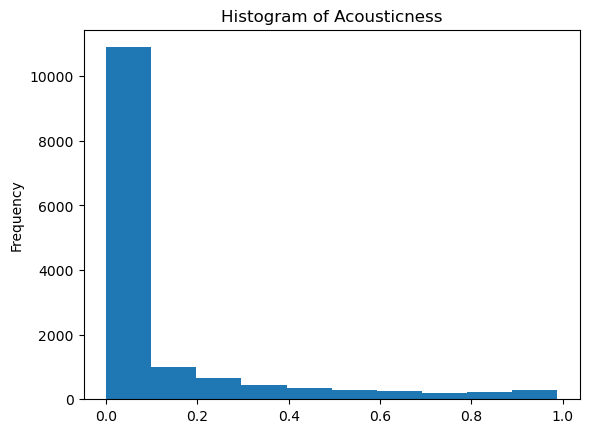

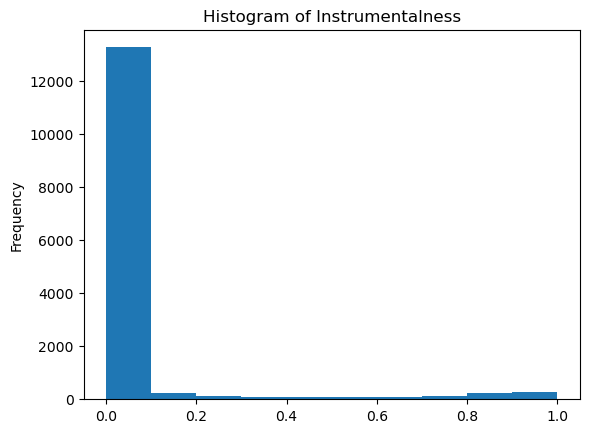

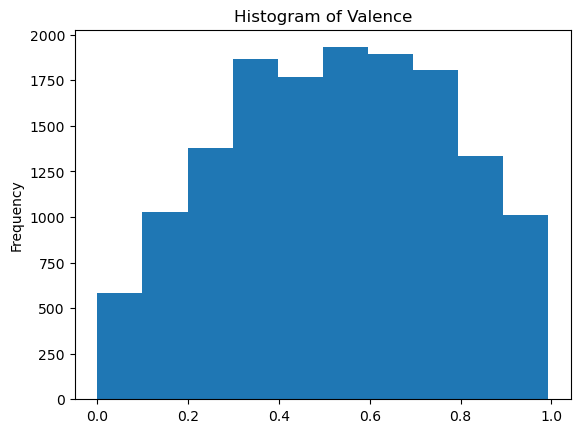

In [ ]:
# plot_hist(df_train_embedding_important_simple, 'Acousticness')
# plot_hist(df_train_embedding_important_simple, 'Instrumentalness')
# plot_hist(df_train_embedding_important_simple, 'Valence')


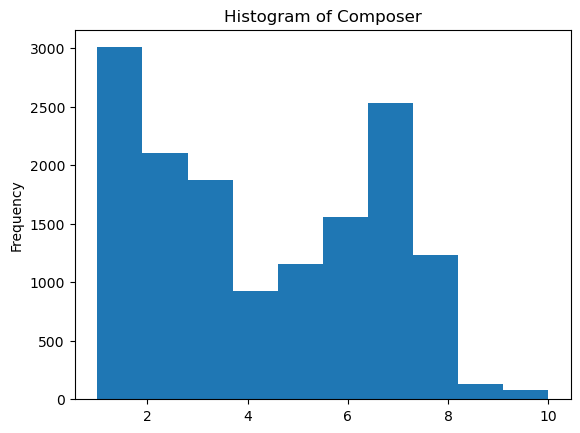

In [ ]:
# plot_hist(df_train_embedding_important_simple, 'Likes')
# plot_hist(df_train_embedding_important_simple, 'Stream')
# plot_hist(df_train_embedding_important_simple, 'Composer')

In [ ]:
# KNN imputation for missing values
from sklearn.impute import KNNImputer
def knn_imputation(df, n_neighbors, column):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=column)
    return df_imputed

#df_train_embedding_important_simple_imputed = knn_imputation(df_train_embedding_important_simple, 5, df_train_embedding_important_simple.columns)


In [ ]:
# we got around 5500 clean data without N/A
# it means that it got around 12000 non-clean data

df_with_clean_data = df_train_embedding_important_simple.dropna()
print("Clean Data without NaN:", len(df_with_clean_data))
print("Data with NaN:", len(df_train_embedding_important_simple) - len(df_with_clean_data))

# Make the clean data to give strength to the dataset
# duplicate 2x to the data training
# so it should dominate the dataset

df_train_embedding_important_simple_added = pd.concat([
    df_train_embedding_important_simple, 
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
    df_with_clean_data,
]).sample(frac=1).reset_index(drop=True)

print("After merging Clean data with distorted data:", len(df_train_embedding_important_simple_added))

Clean Data without NaN: 6574
Data with NaN: 10596
After merging Clean data with distorted data: 56614


In [ ]:
# import pandas as pd
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.ensemble import RandomForestClassifier

# # Mode Imputation
# def impute_mode(df, column):
#     imputer = SimpleImputer(strategy='most_frequent')
#     df[column] = imputer.fit_transform(df[column].values.reshape(-1, 1))
#     return df

# # Predictive Imputation
# def impute_predictive(df, column):
#     # separate the data into two sets: one with missing values and one without
#     missing = df[df[column].isnull()]
#     not_missing = df[df[column].notnull()]

#     # transform the categorical data into ordinal for the classifier
#     enc = OrdinalEncoder()
#     not_missing[column] = enc.fit_transform(not_missing[[column]])

#     # train a classifier on the data without missing values
#     clf = RandomForestClassifier(n_estimators=100)
#     clf.fit(not_missing.drop(column, axis=1), not_missing[column])

#     # predict the missing values
#     missing[column] = clf.predict(missing.drop(column, axis=1))

#     # combine the data back together
#     df = pd.concat([not_missing, missing])
    
#     # inverse transform the imputed and encoded target column back to its original form
#     df[column] = enc.inverse_transform(df[[column]])

#     return df

# # replace 'df' with your dataframe and 'Composer' with your column
# #df = impute_mode(df, 'Composer')
# # or 
# df_train_imp = impute_predictive(df_test_embedding_important_simple, 'Composer')


/tmp/ipykernel_8690/2159128329.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_missing[column] = enc.fit_transform(not_missing[[column]])


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
def conditioning(df):
    df_ret = df.copy()
    df_ret['Stream'] = np.log(df_ret['Stream'])
    df_ret[df_ret['Stream'] == -np.inf] = 0

    df_ret['Likes'] = np.log(df_ret['Likes'])
    df_ret[df_ret['Likes'] == -np.inf] = 0

    df_ret['Instrumentalness'] = np.log(np.abs(df_ret['Instrumentalness']))
    df_ret[df_ret['Instrumentalness'] == -np.inf] = 0

    df_ret['Loudness'] = np.log(np.abs(df_ret['Loudness']))
    df_ret[df_ret['Loudness'] == -np.inf] = 0
    
    df_ret['Acousticness'] = np.log(np.abs(df_ret['Acousticness']))
    df_ret[df_ret['Acousticness'] == -np.inf] = 0
    
    return df_ret

df_train_embedding_important_simple_added_conditioning = conditioning(df_train_embedding_important_simple_added)
df_test_embedding_important_simple_added_conditioning = conditioning(df_test_embedding_important_simple)

#df_train_embedding_important_simple_added_conditioning = df_train_embedding_important_simple_added
#df_test_embedding_important_simple_added_conditioning = df_test_embedding_important_simple

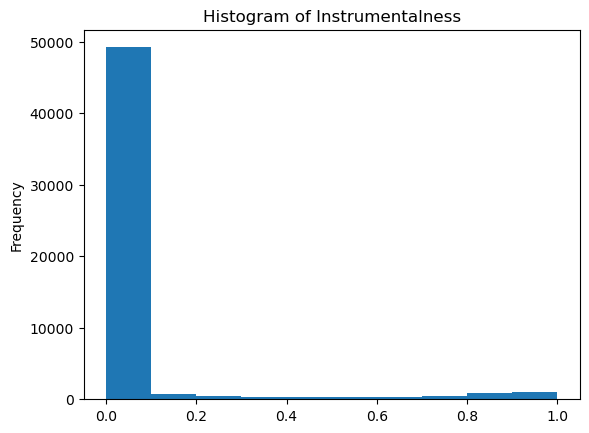

In [ ]:
#plot_hist(df_train_embedding_important_simple_added_conditioning, 'Instrumentalness')
# plot_hist(df_train_embedding_important_simple_added_conditioning, 'Likes')
# plot_hist(df_train_embedding_important_simple_added_conditioning, 'Stream')


In [ ]:
def imputer(df):
    df_ret = df.copy()
    mean_values =  df['Valence'].mean()
    df_ret['Valence'] = df['Valence'].fillna(mean_values)

    mean_values = df['Loudness'].mean()
    df_ret['Loudness'] = df['Loudness'].fillna(mean_values)
    
    mean_values = df['Speechiness'].mean()
    df_ret['Speechiness'] = df['Speechiness'].fillna(mean_values)
    
    mean_values = df['Acousticness'].mean()
    df_ret['Acousticness'] = df['Acousticness'].fillna(mean_values) #0.000000000001)
    
    mean_values = df['Instrumentalness'].mean()
    df_ret['Instrumentalness'] = df['Instrumentalness'].fillna(mean_values)

    #df_ret['Composer'] = df['Composer'].fillna(1)

    return df_ret


df_train_embedding_important_simple_imputer_before_scaler = imputer(df_train_embedding_important_simple_added_conditioning)    
df_test_embedding_important_simple_imputer_before_scaler = imputer(df_test_embedding_important_simple_added_conditioning)    


df_train_embedding_important_simple_imputer_before_scaler = knn_imputation(df_train_embedding_important_simple, 5, 'Composer')
df_test_embedding_important_simple_imputer_before_scaler = knn_imputation(df_test_embedding_important_simple, 5, 'Composer')

In [ ]:
from sklearn.preprocessing import StandardScaler

def scaler(df_train, df_test):
    df_train_non_y = df_train.iloc[:, 1:]
    df_train_y = df_train.iloc[:, :1]
    len_train = len(df_train_non_y)
    print(len_train)
    df_concatenated = pd.concat([
        df_train_non_y, df_test
    ]).reset_index(drop=True)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_concatenated)
    df_train_scaled_non_y = pd.DataFrame(X_scaled[:len_train,:], columns=df_concatenated.columns)
    df_train_scaled_with_y = pd.concat([df_train_y, df_train_scaled_non_y], axis=1)
    df_test_scaled = pd.DataFrame(X_scaled[len_train:,:], columns=df_concatenated.columns)
    return df_train_scaled_with_y, df_test_scaled
    
df_train_embedding_important_simple_imputer, df_test_embedding_important_simple_imputer = scaler(df_train_embedding_important_simple_imputer_before_scaler, df_test_embedding_important_simple_imputer_before_scaler)

NameError: name 'df_train_embedding_important_simple_imputer_before_scaler' is not defined

In [ ]:
print(df_train_embedding_important_simple_imputer_before_scaler)
print(df_train_embedding_important_simple_imputer)

       Danceability  Loudness  Speechiness  Acousticness  Instrumentalness  \
0               3.0    -5.277       0.1600  1.051540e-04          0.000191   
1               5.0    -5.172       0.0503  9.173385e-02          0.056427   
2               0.0   -29.760       0.0445  9.791467e-01          0.888000   
3               7.0    -5.513       0.0720  1.005446e-01          0.000001   
4               6.0    -2.973       0.0601  1.438778e-04          0.000009   
...             ...       ...          ...           ...               ...   
56609           9.0    -4.994       0.0970  3.464598e-05          0.000010   
56610           9.0    -6.771       0.2110  2.954083e-01          0.000000   
56611           3.0   -10.922       0.0259  4.330747e-06          0.152000   
56612           2.0    -1.825       0.1030  9.925285e-17          0.000180   
56613           0.0    -9.634       0.0350  1.314426e-08          0.769000   

        Valence  Composer  
0      0.601000       2.0  
1      

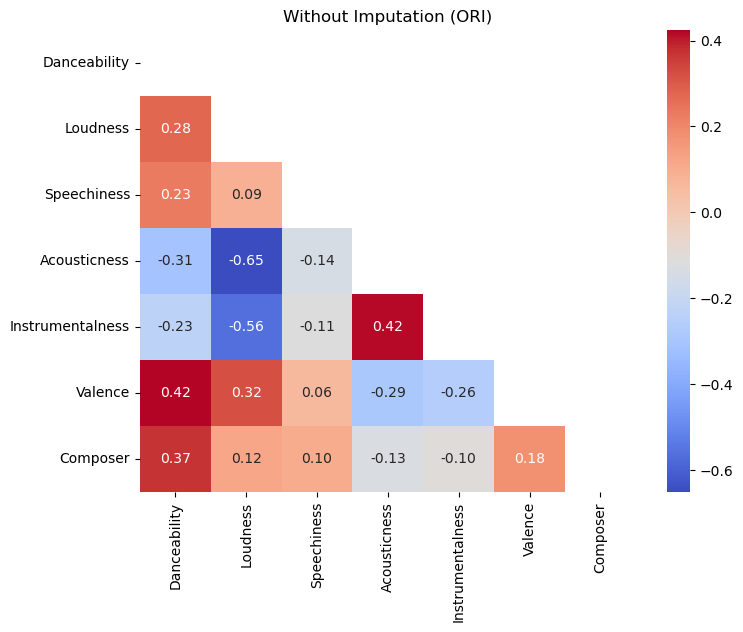

In [ ]:
#corr_matrix_with_threshold(df_train_embedding_important_simple, 0.01, 'Without Imputation (ORI)')


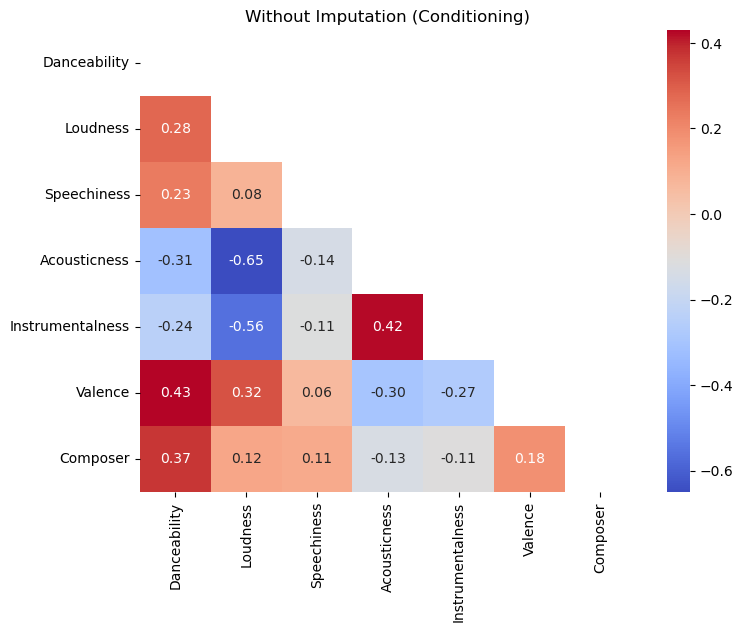

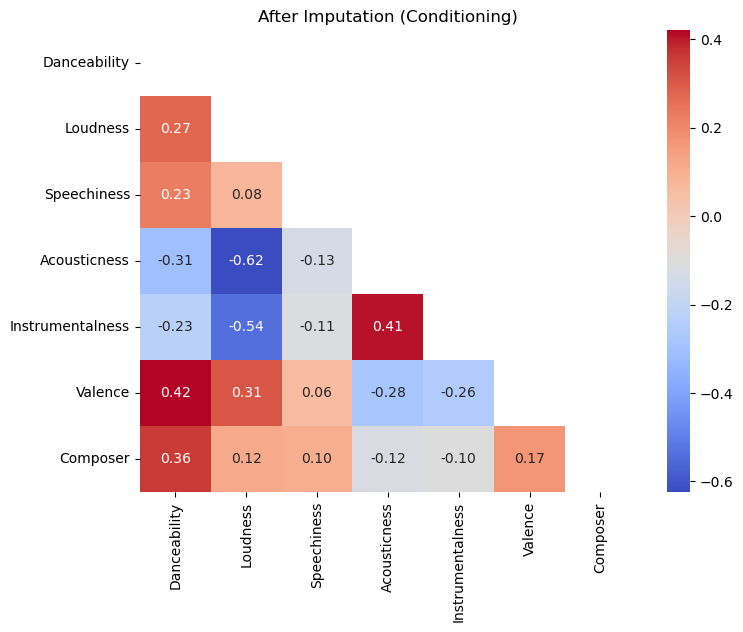

In [ ]:
# corr_matrix_with_threshold(df_train_embedding_important_simple_added_conditioning, 0.01, 'Without Imputation (Conditioning)')
# corr_matrix_with_threshold(df_train_embedding_important_simple_imputer, 0.01, 'After Imputation (Conditioning)')

In [ ]:
from sklearn.model_selection import train_test_split
# train_features, val_features, train_labels, val_labels = train_test_split(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

train_features, val_features, train_labels, val_labels = train_test_split(df_train_embedding_important_simple_imputer.iloc[:, 1:], df_train_embedding_important_simple_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

In [ ]:
train_features

,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Composer
11068,0.779298,3.281312,-0.415918,-0.360895,-0.028187,0.341428
16278,0.344785,1.980498,-0.572278,-0.361709,1.067663,1.603550
14511,0.937908,-0.277043,-0.572318,-0.361694,-0.706406,0.762135
13237,-0.361408,-0.663091,0.944791,-0.199094,-0.685697,1.182843
12870,0.178922,-0.626374,-0.480623,-0.361591,0.065003,-0.331704
...,...,...,...,...,...,...
11284,0.453585,0.721646,-0.570760,-0.361603,1.100452,1.603550
11964,-0.002642,-0.650502,1.646923,-0.361709,-1.177535,-0.499987
5390,0.502706,1.865104,-0.204508,-0.361709,0.466240,-1.341402
860,-1.171075,0.721646,1.152030,-0.361709,-0.034227,0.341428


# All Data

# Try Sofi's Ensemble  (Cascade Level 1)
## Main Feature: Loudness, Speechiness, Acousticness, Instrumentalness, Valence, Composer

In [ ]:
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)


In [ ]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.inspection import DecisionBoundaryDisplay


import pickle
# scaler = MinMaxScaler(feature_range=(0, 9))
# Instantiate the classfiers and make a list
regressors = [
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(random_state=42), n_jobs=6),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features, np.ravel(train_labels))
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table


Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier


,mae,accuracy
regressors,,
LGBWrapper,1.709668,0.178800
RandomForestRegressor,1.766162,0.168026
RandomForestRegressor,1.767036,0.167152
XGBRegressor,1.748981,0.173559
OneVsOneClassifier,1.974665,0.260338


In [ ]:
result_table


,mae,accuracy
regressors,,
LGBWrapper,1.709668,0.178800
RandomForestRegressor,1.766162,0.168026
RandomForestRegressor,1.767036,0.167152
XGBRegressor,1.748981,0.173559
OneVsOneClassifier,1.974665,0.260338


In [ ]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.46111454561511966


In [ ]:
# train on the full training set
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(
        df_train_embedding_important_simple_imputer.iloc[:, 1:],                # Full X data
        np.ravel(df_train_embedding_important_simple_imputer.iloc[:, :1])       # Full Y label
    )

Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier


In [ ]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)

    return avg_predictions, predictions

# Make ensemble predictions
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, df_test_embedding_important_simple_imputer)


In [ ]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l1
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1_cascade_' + datetime_string + '.csv', index=False)

In [ ]:
np.rint(predictionsTest)

array([7., 4., 3., ..., 2., 5., 6.])

# Start Cascade Level 1.5 (just re-train using "cheat from submission")

In [ ]:
df_hasil = pd.DataFrame()

tmp = pd.read_csv('old1.csv')
tmp = tmp.drop('id', axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)
df_hasil = pd.concat([df_hasil, tmp], axis=1)


In [ ]:

for t in range(2,8):
    tmp = pd.read_csv('old'+ str(t) +'.csv')
    tmp = tmp.drop('id', axis=1)
    df_hasil = pd.concat([df_hasil, tmp], axis=1)

# print(df_hasil)
label_test = df_hasil.mean(axis=1)

tmp_danceability = pd.DataFrame(np.rint(label_test), columns=['Danceability'])
concat_cheat = pd.concat([tmp_danceability, df_test_embedding_important_simple_imputer ], axis=1)



In [ ]:
pd_new_generated = pd.concat([df_train_embedding_important_simple_imputer, concat_cheat, concat_cheat])
pd_new_generated = pd_new_generated.sample(frac=1).reset_index(drop=True)
pd_new_generated

,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Composer
0,2.0,-0.000394,-0.235403,-0.536449,-0.300393,-1.275212,-0.003607
1,6.0,-0.167702,-0.682779,-0.483054,-0.321432,0.528660,0.777689
2,6.0,0.499069,-0.500403,-0.544396,-0.321666,0.574914,1.558984
3,7.0,0.661567,0.604403,-0.530181,-0.293950,-0.473141,0.387041
4,3.0,0.990256,-0.477228,-0.544200,-0.321282,0.642191,-0.003607
...,...,...,...,...,...,...,...
69239,5.0,-0.226304,1.489613,-0.545497,-0.218071,0.129202,1.558984
69240,9.0,0.703283,-0.416772,-0.386446,-0.297910,-0.009558,-0.003607
69241,8.0,0.032933,-0.617285,-0.545792,3.211948,1.861591,-0.394254
69242,5.0,0.918009,0.139425,-0.522460,-0.322073,-0.993488,-1.175550


In [ ]:
# Train using Full Training dataset + slight-cheating majority from previous submission
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(pd_new_generated.iloc[:, 1:], np.ravel(pd_new_generated.iloc[:, :1]))    
    pred = reg.predict(val_features)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)


Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor


In [ ]:
result_table

,mae,accuracy
regressors,,
OneVsOneClassifier,1.908946,0.270070
KNeighborsClassifier,0.342930,0.889870
SVC,1.172481,0.555948
RandomForestClassifier,1.968825,0.231829
AdaBoostClassifier,2.077100,0.228738


In [ ]:
print("Mean Accuracy", np.mean(result_table['accuracy']))

Mean Accuracy 0.4352910006182107


In [ ]:
# Make ensemble predictions
ensemble_predictions_l2, all_predictions = ensemble_predict(regressors, df_test_embedding_important_simple_imputer)


In [ ]:
current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_l2
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds.to_csv('L1.5_cascade_' + datetime_string + '.csv', index=False)

In [ ]:
all_predictions.shape

# Start Cascade Level 2
## Main Feature: Key, Loudness, Tempo

## NB: This part still on progress

In [ ]:
arr_NOT_important_column_l2 = [ 'Energy', 'Valence', 'Album_type', 'Track', 'Comments', 'Channel', 'Composer', 'Artist', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Duration_ms', 'Views', 'Likes', 'Stream', 'Uri', 'Url_spotify', 'Url_youtube', 'Description', 'id', 'Licensed', 'official_video', 'Title', 'Album']
df_train_embedding_important_l2 = remove_unimportant_column(df_train_embedding, arr_NOT_important_column_l2)
df_test_embedding_important_l2 = remove_unimportant_column(df_test_embedding, arr_NOT_important_column_l2)
df_train_embedding_important_l2

In [ ]:
df_train_embedding_important_l2_clean = df_train_embedding_important_l2.dropna()
df_train_embedding_important_l2_clean

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def imputer_l2(df):
    df_ret = df.copy()
    df_ret['Key'] = df['Key'].fillna(-1)

    mean_values = df['Loudness'].mean()
    df_ret['Loudness'] = df['Loudness'].fillna(mean_values)
    
    mean_values = df['Tempo'].mean()
    df_ret['Tempo'] = df['Tempo'].fillna(mean_values)
    
    return df_ret


df_train_embedding_important_l2_clean_imputer = imputer_l2(df_train_embedding_important_l2_clean)    
df_test_embedding_important_simple_l2_imputer = imputer_l2(df_test_embedding_important_l2)    
print(df_train_embedding_important_l2_clean)
print(df_train_embedding_important_l2_clean_imputer)

In [ ]:
corr_matrix_with_threshold(df_train_embedding_important_l2_clean, 0.01, 'Without Imputation (Conditioning)')
corr_matrix_with_threshold(df_train_embedding_important_l2_clean_imputer, 0.01, 'After Imputation (Conditioning)')

In [ ]:
from sklearn.model_selection import train_test_split
train_features_l2, val_features_l2, train_labels_l2, val_labels_l2 = train_test_split(df_train_embedding_important_l2_clean_imputer.iloc[:, 1:], df_train_embedding_important_l2_clean_imputer.iloc[:, :1], test_size = 0.20, random_state = 42)

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

regressors_l2 = [
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(n_estimators=3, random_state=42)),
    SVC(kernel='rbf', gamma='auto'),
]
# Define a result table as a DataFrame
result_table_l2 = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])

# Train and evaluate each classifier
for reg in regressors_l2:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features_l2, np.ravel(train_labels_l2))
    pred = reg.predict(val_features_l2)
    accuracy = accuracy_score(np.ravel(val_labels_l2), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels_l2), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table_l2 = pd.concat([result_table_l2, pd_tmp])

result_table_l2.set_index('regressors', inplace=True)
result_table_l2.sort_values(by=['mae'], ascending=True)
result_table_l2